# 分析热门型号的累计占比百分比

2021-4-10

In [341]:
import pandas as pd
path = r'/Users/dufy/Documents/副本cc7033b20a4b1018.xlsx'
df= pd.read_excel(path)
df.head()

,品牌年度\n下单金额排名,品牌,型号,报价\n成本金额,下单\n金额,金额\n转化率,报价\n客户数,下单\n客户数,客户数\n转化率,报价\n条数,...,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216
0,1.0,ST(意法半导体),L970813TR,7.272180e+05,8216612.00,11.298692,1,1.0,1.000000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79800.0,NaN,NaN
1,1.0,ST(意法半导体),VL6180XV0NR/1,2.139177e+06,7129859.34,3.332992,5,3.0,0.600000,14,...,70000.0,NaN,10000.0,160000.0,120000.0,50000.0,100010.0,NaN,NaN,15000.0
2,1.0,ST(意法半导体),STM32F103VCT6,5.033553e+06,3863882.33,0.767625,98,33.0,0.336735,181,...,52640.0,30270.0,31837.0,17980.0,35383.0,21195.0,42962.0,30261.0,769.0,6610.0
3,1.0,ST(意法半导体),STM32F030C8T6,7.172963e+06,3358190.99,0.468173,89,30.0,0.337079,165,...,83488.0,14716.0,93200.0,91516.0,212562.0,92396.0,93182.0,31031.0,30030.0,985.0
4,1.0,ST(意法半导体),STM8L052C6T6TR,5.350479e+05,1629870.42,3.046214,8,4.0,0.500000,13,...,2200.0,NaN,NaN,NaN,112800.0,112815.0,8300.0,NaN,252000.0,96000.0


In [342]:
df1 = df.loc[:, ['品牌年度\n下单金额排名', '品牌', '型号','报价\n成本金额','下单\n金额']]
df1

,品牌年度\n下单金额排名,品牌,型号,报价\n成本金额,下单\n金额
0,1.0,ST(意法半导体),L970813TR,7.272180e+05,8216612.00
1,1.0,ST(意法半导体),VL6180XV0NR/1,2.139177e+06,7129859.34
2,1.0,ST(意法半导体),STM32F103VCT6,5.033553e+06,3863882.33
3,1.0,ST(意法半导体),STM32F030C8T6,7.172963e+06,3358190.99
4,1.0,ST(意法半导体),STM8L052C6T6TR,5.350479e+05,1629870.42
...,...,...,...,...,...
132254,NaN,未标准,组合螺丝,0.000000e+00,NaN
132255,NaN,未标准,绝缘片TO-220,0.000000e+00,NaN
132256,NaN,未标准,翠绿TR-03SMD2835WG-VG-PL-01,2.640000e+03,NaN
132257,NaN,未标准,铜柱M3*11+6,4.514000e+01,NaN


In [352]:
# df2 = df[pd.notnull(df['下单\n金额'])]
df2 = df1.loc[df1['下单\n金额'].notnull(), :]
df2

,品牌年度\n下单金额排名,品牌,型号,报价\n成本金额,下单\n金额
0,1.0,ST(意法半导体),L970813TR,7.272180e+05,8216612.00
1,1.0,ST(意法半导体),VL6180XV0NR/1,2.139177e+06,7129859.34
2,1.0,ST(意法半导体),STM32F103VCT6,5.033553e+06,3863882.33
3,1.0,ST(意法半导体),STM32F030C8T6,7.172963e+06,3358190.99
4,1.0,ST(意法半导体),STM8L052C6T6TR,5.350479e+05,1629870.42
...,...,...,...,...,...
129178,NaN,未标准,XH2.54-4P白胶直插,2.400000e+03,0.00
129179,NaN,未标准,单排排针2.54-10P直针,1.880630e+03,0.00
129180,NaN,未标准,单排排针2.54-3P直针,1.203600e+03,0.00
129181,NaN,未标准,单排排针2.54-8P直针,1.504500e+03,0.00


In [386]:
df3 = df2.sort_values(by=['下单\n金额'], ascending=False)
df3

total_amount  = sum(df3['下单\n金额'])
df3['占比/%'] = round(df1['下单\n金额']/total_amount*100, 100)
# df3['占比累计/%'] = [sum(df3['占比/%'][:ind+1]) for ind,val in enumerate(df3['占比/%'])] # 太慢！！！
df3['占比累计/%'] = df3['占比/%'].cumsum()
df3


,品牌年度\n下单金额排名,品牌,型号,报价\n成本金额,下单\n金额,占比/%,占比累计/%
0,1.0,ST(意法半导体),L970813TR,7.272180e+05,8216612.00,3.790558,3.790558
1,1.0,ST(意法半导体),VL6180XV0NR/1,2.139177e+06,7129859.34,3.289208,7.079767
25875,9.0,Rockchip(瑞芯微),RK3288,2.663997e+06,4521523.08,2.085908,9.165675
2,1.0,ST(意法半导体),STM32F103VCT6,5.033553e+06,3863882.33,1.782520,10.948194
25900,10.0,Xilinx(赛灵思),XC7Z010-1CLG400C,2.180690e+06,3433694.00,1.584061,12.532256
...,...,...,...,...,...,...,...
61486,31.0,Everlight(亿光),204-10SURC/S400-A8,2.800000e+03,0.00,0.000000,100.000000
61485,31.0,Everlight(亿光),19-21/R7C-AK1L2BY/3T,2.250000e+02,0.00,0.000000,100.000000
61484,31.0,Everlight(亿光),18-225A/R6GHC-A01/3T,7.274000e+04,0.00,0.000000,100.000000
61220,30.0,Quectel(移远),BC25B5PB-04-STD,4.590000e+04,0.00,0.000000,100.000000


In [387]:
df3['原始序列号'] = df3.index  # df.index 将索引添加为新列
df3

,品牌年度\n下单金额排名,品牌,型号,报价\n成本金额,下单\n金额,占比/%,占比累计/%,原始序列号
0,1.0,ST(意法半导体),L970813TR,7.272180e+05,8216612.00,3.790558,3.790558,0
1,1.0,ST(意法半导体),VL6180XV0NR/1,2.139177e+06,7129859.34,3.289208,7.079767,1
25875,9.0,Rockchip(瑞芯微),RK3288,2.663997e+06,4521523.08,2.085908,9.165675,25875
2,1.0,ST(意法半导体),STM32F103VCT6,5.033553e+06,3863882.33,1.782520,10.948194,2
25900,10.0,Xilinx(赛灵思),XC7Z010-1CLG400C,2.180690e+06,3433694.00,1.584061,12.532256,25900
...,...,...,...,...,...,...,...,...
61486,31.0,Everlight(亿光),204-10SURC/S400-A8,2.800000e+03,0.00,0.000000,100.000000,61486
61485,31.0,Everlight(亿光),19-21/R7C-AK1L2BY/3T,2.250000e+02,0.00,0.000000,100.000000,61485
61484,31.0,Everlight(亿光),18-225A/R6GHC-A01/3T,7.274000e+04,0.00,0.000000,100.000000,61484
61220,30.0,Quectel(移远),BC25B5PB-04-STD,4.590000e+04,0.00,0.000000,100.000000,61220


In [388]:
df3.reset_index(drop=True, inplace=True)  # 重置索引
df3

,品牌年度\n下单金额排名,品牌,型号,报价\n成本金额,下单\n金额,占比/%,占比累计/%,原始序列号
0,1.0,ST(意法半导体),L970813TR,7.272180e+05,8216612.00,3.790558,3.790558,0
1,1.0,ST(意法半导体),VL6180XV0NR/1,2.139177e+06,7129859.34,3.289208,7.079767,1
2,9.0,Rockchip(瑞芯微),RK3288,2.663997e+06,4521523.08,2.085908,9.165675,25875
3,1.0,ST(意法半导体),STM32F103VCT6,5.033553e+06,3863882.33,1.782520,10.948194,2
4,10.0,Xilinx(赛灵思),XC7Z010-1CLG400C,2.180690e+06,3433694.00,1.584061,12.532256,25900
...,...,...,...,...,...,...,...,...
37209,31.0,Everlight(亿光),204-10SURC/S400-A8,2.800000e+03,0.00,0.000000,100.000000,61486
37210,31.0,Everlight(亿光),19-21/R7C-AK1L2BY/3T,2.250000e+02,0.00,0.000000,100.000000,61485
37211,31.0,Everlight(亿光),18-225A/R6GHC-A01/3T,7.274000e+04,0.00,0.000000,100.000000,61484
37212,30.0,Quectel(移远),BC25B5PB-04-STD,4.590000e+04,0.00,0.000000,100.000000,61220


In [389]:
df3._stat_axis.values.tolist() # 行名称
df3.columns.values.tolist()    # 列名称

['品牌年度\n下单金额排名', '品牌', '型号', '报价\n成本金额', '下单\n金额', '占比/%', '占比累计/%', '原始序列号']

In [431]:
# 调整顺序
order = ['原始序列号','品牌年度\n下单金额排名', '品牌', '型号', '报价\n成本金额', '下单\n金额', '占比/%', '占比累计/%']
df4 = df3[order]
df4

,原始序列号,品牌年度\n下单金额排名,品牌,型号,报价\n成本金额,下单\n金额,占比/%,占比累计/%
0,0,1.0,ST(意法半导体),L970813TR,7.272180e+05,8216612.00,3.790558,3.790558
1,1,1.0,ST(意法半导体),VL6180XV0NR/1,2.139177e+06,7129859.34,3.289208,7.079767
2,25875,9.0,Rockchip(瑞芯微),RK3288,2.663997e+06,4521523.08,2.085908,9.165675
3,2,1.0,ST(意法半导体),STM32F103VCT6,5.033553e+06,3863882.33,1.782520,10.948194
4,25900,10.0,Xilinx(赛灵思),XC7Z010-1CLG400C,2.180690e+06,3433694.00,1.584061,12.532256
...,...,...,...,...,...,...,...,...
37209,61486,31.0,Everlight(亿光),204-10SURC/S400-A8,2.800000e+03,0.00,0.000000,100.000000
37210,61485,31.0,Everlight(亿光),19-21/R7C-AK1L2BY/3T,2.250000e+02,0.00,0.000000,100.000000
37211,61484,31.0,Everlight(亿光),18-225A/R6GHC-A01/3T,7.274000e+04,0.00,0.000000,100.000000
37212,61220,30.0,Quectel(移远),BC25B5PB-04-STD,4.590000e+04,0.00,0.000000,100.000000


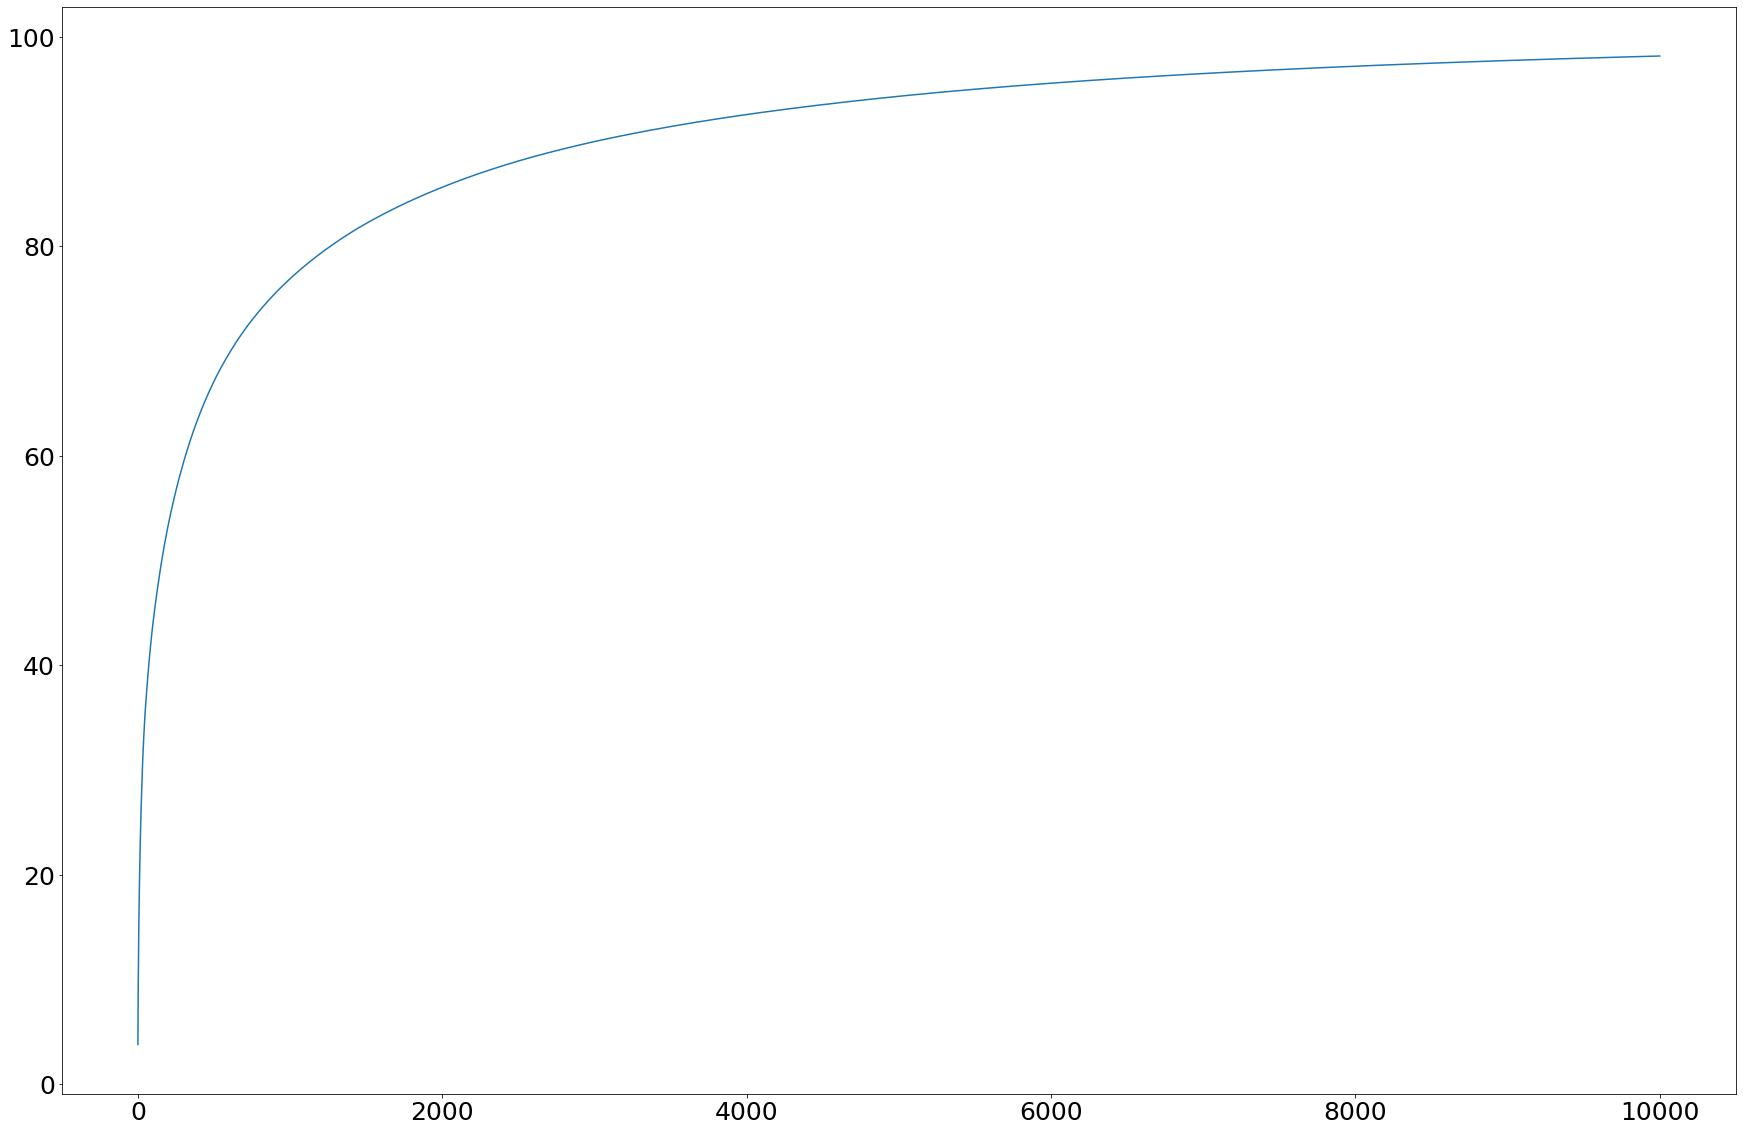

In [474]:
df4.to_excel('下单金额排序.xls')
df4[:10000]['占比累计/%'].plot()

No handles with labels found to put in legend.


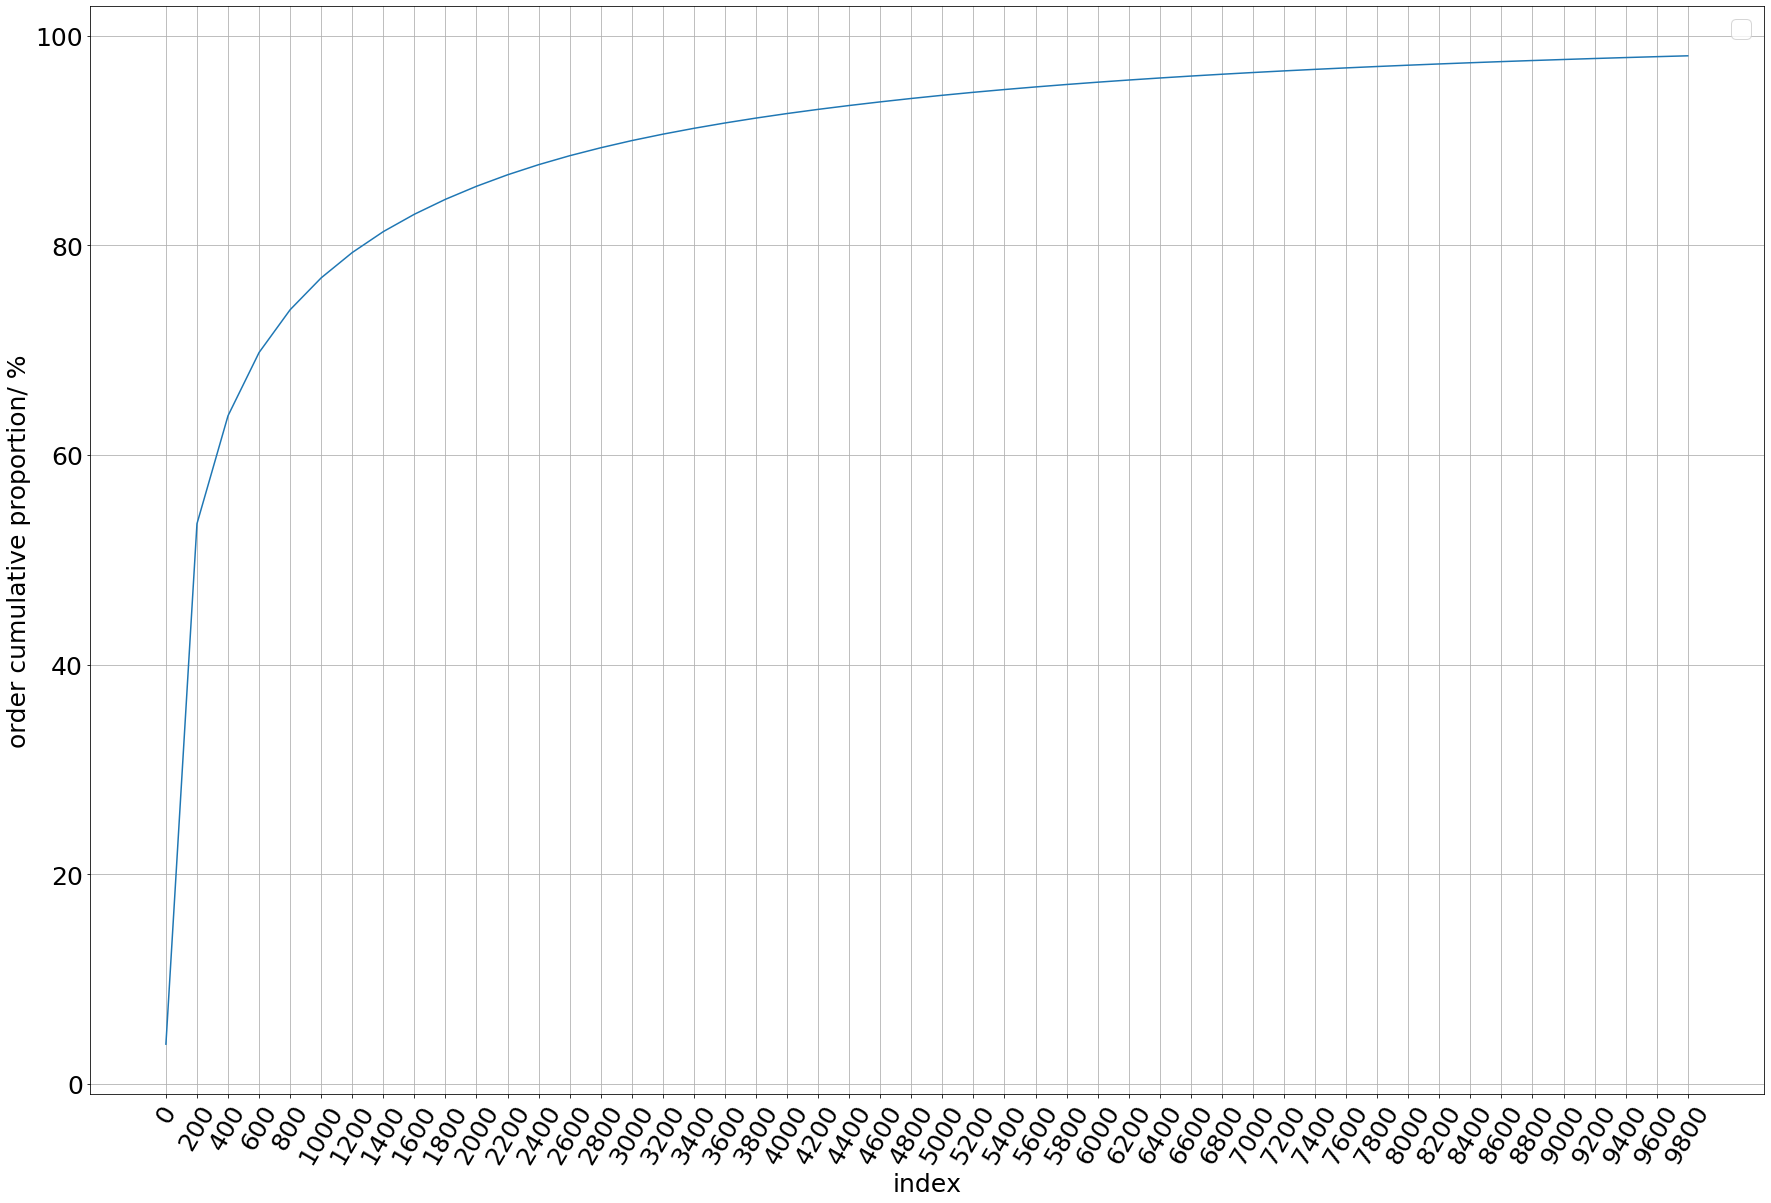

<Figure size 720x720 with 0 Axes>

In [475]:
# 设置不同阈值，观察被动件的匹配率和准确率情况
# %matplotlib inline
# from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
import numpy as np

matching_ratio = []  # 匹配率
accuracy = [] # 准确率

threshold_value = 0.01  # 概率阈值
x = np.arange(0, 10000, 200)
# for threshold_value in x:
# #     print(threshold_value)
    
#     df_passivity_above_threshold_value = df_passivity.loc[(df_passivity['预测概率']>= threshold_value), :]  # 选取阈值以上的所有语料
#     df_passivity_above_threshold_value.head()



#     matching_ratio_i = df_passivity_above_threshold_value.shape[0]/ df_passivity.shape[0] # 当前 阈值的匹配率
#     matching_ratio.append(matching_ratio_i)

#     # df_passivity_all_corpus
#     df_passivity_all_corpus_correct = df_passivity_above_threshold_value.loc[(df_passivity_above_threshold_value['预测类目']==df_passivity_above_threshold_value['人工标注']), :]
#     accuracy.append(df_passivity_all_corpus_correct.shape[0]/df_passivity_above_threshold_value.shape[0])

# matching_ratio, accuracy
# func = lambda x,y:x*y
# result = map(func,matching_ratio,accuracy)
# list_result = list(result) # 总体覆盖率


import matplotlib.pyplot as plt
plt.plot(x, df4[:10000:200]['占比累计/%'])
# plt.plot(x, accuracy, label='预测准确率')
# plt.plot(x, list_result, label='总体覆盖率')

plt.legend(loc='upper right')
plt.xlabel("index")
plt.ylabel("order cumulative proportion/ %") #累计占比
plt.xticks(fontsize=25)
plt.rcParams.update({'font.size': 25})
# my_x_ticks = np.arange(0, 1, 0.05)
# plt.xticks(my_x_ticks)
plt.xticks(x, rotation=60)
plt.grid()
plt.rcParams['figure.figsize'] = (30.0, 20.0)   # 单位是inches
plt.figure(figsize=(10,10))  #这时候横坐标和纵坐标都放大了10倍：
plt.show()